# Глава 5

## Задание 5.1.

Оценить высоты тона вокального чирпа для нескольких времен начала сегмента.

Время начала: 0.1 с, оцененная частота: 484.62 Гц
Время начала: 0.2 с, оцененная частота: 436.63 Гц
Время начала: 0.3 с, оцененная частота: 201.37 Гц
Время начала: 0.4 с, оцененная частота: 380.17 Гц


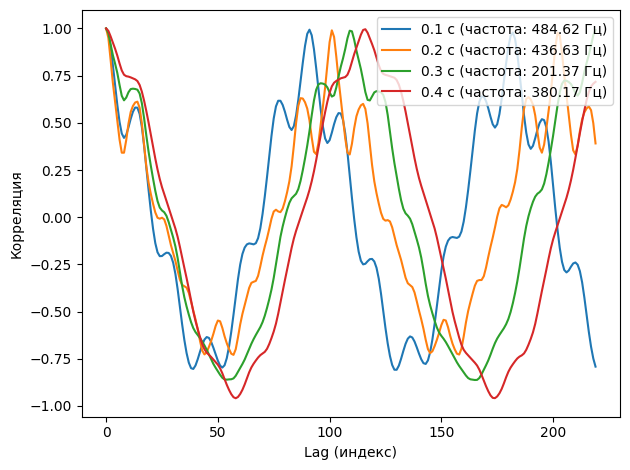

In [8]:
import numpy as np
import matplotlib.pyplot as plt
from thinkdsp import read_wave, decorate

def serial_corr(wave, lag=1):
    N = len(wave)
    y1 = wave.ys[lag:]
    y2 = wave.ys[:N-lag]
    corr = np.corrcoef(y1, y2)[0, 1]
    return corr

def autocorr(wave):
    lags = np.arange(len(wave.ys)//2)
    corrs = [serial_corr(wave, lag) for lag in lags]
    return lags, corrs

def estimate_pitch(segment):
    lags, corrs = autocorr(segment)
    low = 50
    high = 500
    min_lag = int(segment.framerate / high)
    max_lag = int(segment.framerate / low)

    lag = min_lag + np.argmax(corrs[min_lag:max_lag])

    frequency = segment.framerate / lag
    return frequency

wave = read_wave('code_28042__bcjordan__voicedownbew.wav')
wave.normalize()
start_times = [0.1, 0.2, 0.3, 0.4]
duration = 0.01

for start in start_times:
    segment = wave.segment(start=start, duration=duration)
    frequency = estimate_pitch(segment)
    print(f"Время начала: {start:.1f} с, оцененная частота: {frequency:.2f} Гц")

    lags, corrs = autocorr(segment)
    plt.plot(lags, corrs, label=f"{start:.1f} с (частота: {frequency:.2f} Гц)")

decorate(xlabel='Lag (индекс)', ylabel='Корреляция')
plt.legend()
plt.show()

## Задание 5.2.

Инкапсулировать пример кода в chap05.ipynb в функцию, названную estimate_fundamental, и использовать ее для отслеживания высоты тона записанного звука. Проверить, насколько хорошо она работает, накладывая оценки высоты тона на спектрограмму записи.

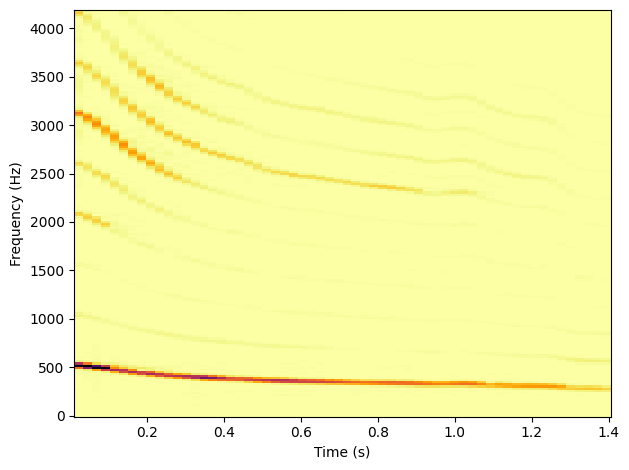

In [9]:
wave.make_spectrogram(2048).plot(high=4200)
decorate(xlabel='Time (s)',
         ylabel='Frequency (Hz)')

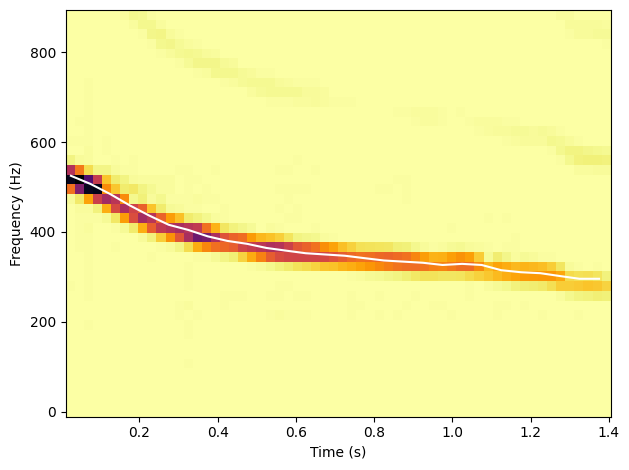

In [14]:
def estimate_fundamental(segment, low=70, high=150):
    lags, corrs = autocorr(segment)
    lag = np.array(corrs[low:high]).argmax() + low
    period = lag / segment.framerate
    frequency = 1 / period
    return frequency

step = 0.05
starts = np.arange(0.0, 1.4, step)
ts = []
freqs = []

for start in starts:
    ts.append(start + step/2)
    segment = wave.segment(start=start, duration=duration)
    freq = estimate_fundamental(segment)
    freqs.append(freq)
ff = estimate_fundamental(segment)
wave.make_spectrogram(2048).plot(high=900)
plt.plot(ts, freqs, color='white')
decorate(xlabel='Time (s)',
                     ylabel='Frequency (Hz)')

Полученная кривая, наложенная на спектрограмму, показывает отслеживание высоты тона от времени.

## Задание 5.3.

Открыть данные об истории стоимости BitCoin и вычислить автокорреляции цен в платежной системе Bitcoin. Определить быстро ли спадает автокорреляционная функция и есть ли признаки периодичности процесса.

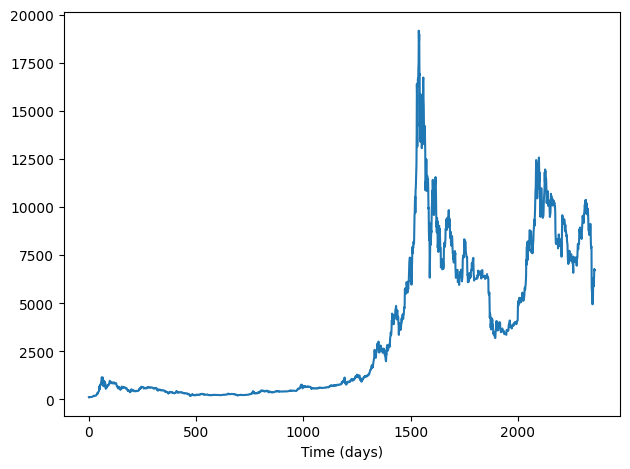

In [22]:
import pandas as pd
from thinkdsp import Wave

df = pd.read_csv('BTC_USD_2013-10-01_2020-03-26-CoinDesk.csv')
ys = df['Closing Price (USD)']
ts = df.index

wave = Wave(ys, ts, framerate=1)
wave.plot()
decorate(xlabel='Time (days)')

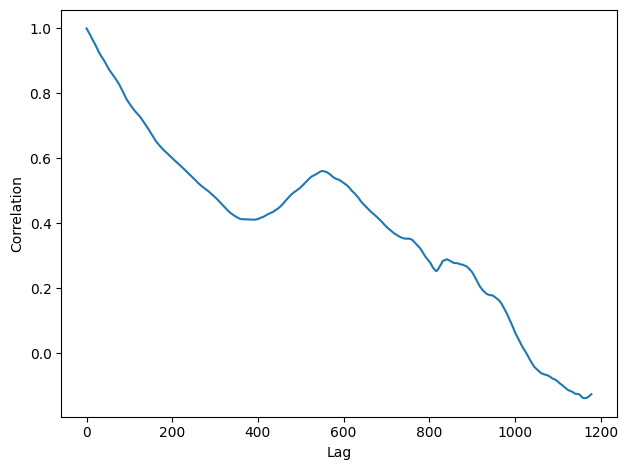

In [23]:
lags, corrs = autocorr(wave)
plt.plot(lags, corrs)
decorate(xlabel='Lag',
         ylabel='Correlation')

In [24]:
threshold = 0.2
lag_threshold = np.argmax(np.array(corrs) < threshold)
print(f"АКФ спадает ниже {threshold} на лаге {lag_threshold}")

АКФ спадает ниже 0.2 на лаге 922


Визуальная оценка показывает, что явная периодичность не наблюдается.